In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

%matplotlib inline

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset_MantenimientoMaquinas.csv")
x = data.iloc[:,2:8]
y = data.iloc[:,8]

In [ ]:
def cambiarDatos():
  tipo = {"M":1,"L":2,"H":3}
  x["Type"] = x["Type"].map(tipo)

In [ ]:
cambiarDatos()
x = np.array(x)
y = np.array(y)
n_ejemplos = y.size

In [ ]:
def funcionSigmoidea(z):
  z = np.array(z)
  g = 1/(1+np.exp(-z))
  return g

In [ ]:
x = np.concatenate((np.ones((n_ejemplos,1)),x),axis=1)

In [ ]:
def calcularCosto(theta, x, y):
  h = funcionSigmoidea(x.dot(theta.T))
  J = (1/n_ejemplos)*np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
  return J

In [ ]:
def descensoGradiente(x, y, theta, alpha, n_iteraciones):
  historial_J = []
  theta = theta.copy()
  for i in range (n_iteraciones):
    h = funcionSigmoidea(x.dot(theta.T))
    theta = theta-(alpha/n_ejemplos)*(h-y).dot(x)
    historial_J.append(calcularCosto(theta,x,y))
  return theta, historial_J

In [ ]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 500
  alpha = 0.00002
  theta, historial_J = descensoGradiente(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [ ]:
theta, historial_J = hallarTheta()
print("Las thetas encontradas son: ",theta)
print("El menor costo que se pudo determinar fue de: ",historial_J[-1])

Las thetas encontradas son:  [-3.87926938e-06 -1.46068126e-06 -8.62447788e-04 -1.10394181e-03
 -2.40383182e-03  2.31658307e-03  6.58415437e-03]
El menor costo que se pudo determinar fue de:  0.14133368070951227


Text(0, 0.5, 'Costo J')

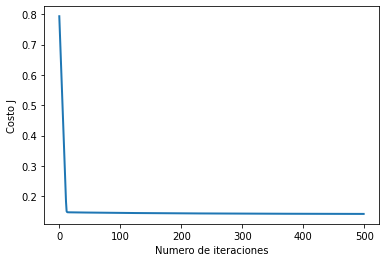

In [ ]:
pyplot.plot(np.arange(len(historial_J)), historial_J, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [ ]:
def predecir(x):
  x = np.array(x)
  x = np.concatenate((np.ones(1),x))
  y_predecir = funcionSigmoidea(np.dot(x,theta))
  print("El porcentaje de los valores de x para presentar una falla es ",y_predecir*100)

In [ ]:
predecir([2,3,2.5,1.3,5,5])

El porcentaje de los valores de x para presentar una falla es  50.90052029562695


#Hallando Theta optimizada

In [ ]:
def funcionCosto(theta, x, y):
    h = funcionSigmoidea(x.dot(theta.T))
    J = (1/n_ejemplos)*np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
    gradiente = (1/n_ejemplos)*(h-y).dot(x)
    return J, gradiente

In [ ]:
def optimizarTheta():
  opciones = {"maxiter":1000}
  thetaInicial = np.zeros(x.shape[1])
  optimizacion = optimize.minimize(funcionCosto,thetaInicial,(x,y),jac=True,method="TNC",options=opciones)
  costo = optimizacion.fun
  theta_optimizada = optimizacion.x
  return theta_optimizada, costo

In [ ]:
theta_funcionCosto, costo = optimizarTheta()
print(theta_funcionCosto)

[-2.66901559e+01  4.20248139e-02  8.47179918e-01 -8.48765668e-01
  1.16182431e-02  2.82883740e-01  1.34203263e-02]


In [ ]:
def predecirThetaOptimizada(x):
  x = np.array(x)
  x = np.concatenate((np.ones(1),x))
  y_predecir = funcionSigmoidea(np.dot(x,theta_funcionCosto))
  print("El porcentaje de los valores de x para presentar una falla es ",y_predecir*100)

In [ ]:
predecirThetaOptimizada([2,3,2.5,1.3,5,5])

El porcentaje de los valores de x para presentar una falla es  1.893788578723964e-09


#Metodo de la normal

In [ ]:
def metodoNormal(x, y):
  x = np.float64(x)
  y = np.float64(y)
  theta = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
  return theta

In [ ]:
theta = metodoNormal(x,y)
print("Las thetas encontradas son: ",theta)
x_predecir = [1,2,3,2.5,1.3,5,5]
x_predecir = np.array(x_predecir)
y_predecir = funcionSigmoidea(np.dot(x_predecir,theta))
print("El porcentaje de los valores de x para presentar una falla es ",y_predecir*100)

Las thetas encontradas son:  [-1.30152802e+00  2.29399976e-03  1.90038003e-02 -1.83373649e-02
  5.26913057e-04  1.17859104e-02  3.02594378e-04]
El porcentaje de los valores de x para presentar una falla es  22.712013369620447
